# COFFEE IMAGE CLASSIFICATION
Collaborators:
- Crystal Wanjiru
- Randell Mwania
- Ian Kedeyie
- Sadi Kiri
- Simon Ng'ethe
- Victorine Imbuhila


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Overview
## Business Understanding
The project aims to address the significant threat posed by three major diseases—Coffee rust, Cercospora, and Phoma—to coffee plants in the highland areas of Kenya. These diseases have the potential to adversely impact the livelihoods of small-scale farmers who heavily depend on coffee cultivation. By implementing a technological solution for early and accurate detection of these diseases, the project seeks to empower farmers to take timely preventive measures, such as the application of fungicides, to mitigate the impact on their crops. The ultimate goal is to preserve the cultural and economic significance of coffee cultivation and contribute to the sustainability of Arabica coffee farming in the region.

## Problem Statement
The three major diseases-coffee rust, cercospora and phoma affect coffee plants and can affect the livelihoods of small-scale farmers who rely on the cultivation of coffee in the highland areas of Kenya. This project will help farmers identify these diseases at an early stage, which gives them time to take preventive measures that will reduce the impact of these diseases on their crops e.g. by using fungicides. This will give farmers a technological solution for early and accurate detection of coffee diseases. This will in turn preserve the livelihoods of the farmers, preserve the coffee culture and contribute to the sustainability of Arabica coffee cultivation.

## Objectives
Main Objective:
To develop a Convolutional Neural Network(CNN) based image classifcation model capable of accurarely distingushing between the three classes of Coffee leaf diseases.

Specific Objectives:
- To identify any patterns or anomalies in the data that may influence model performance.
- To train the mdeol using the provided dataset and evaluate its perfomance on a separate validation set.
- To explore options for deploying the trained model making it accessible for stakeholders.

# Data Understanding
The dataset contains leaf images which were collected from Arabica coffee type and it shows three sets of unhealthy images and a set of healthy images. The data obtained from [Dataset on Mendeley](https://data.mendeley.com/datasets/t2r6rszp5c/1),[Dataset on Mendeley](https://data.mendeley.com/datasets/tgv3zb82nd/1).



In [2]:

import os

# Specify the path to the main folder containing subfolders for each class
main_folder_path = '/content/drive/MyDrive/Imageclassification2/extracted2'

# Get a list of subfolders (each subfolder corresponds to a class)
class_folders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))and folder != ".ipynb_checkpoints"]

# Display the number of classes
num_classes = len(class_folders)
print(f"Number of Classes: {num_classes}")
# Display the number of images in each class
for class_name in class_folders:
    class_path = os.path.join(main_folder_path, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of Images: {num_images}")


Number of Classes: 4
Class: Healthy, Number of Images: 18981
Class: Cerscospora, Number of Images: 7681
Class: Phoma, Number of Images: 6571
Class: Leafrust, Number of Images: 8336


The data contains 41,569 images from four different classes. One set contains images of healthy coffee leaves while the other 3 contain images of unhealthy leaves, the diseases represented are Coffee Rust, Cercospora and Phoma

## Data Preparation

In [3]:
import cv2
import imghdr
#Getting rid of any images that are not jpeg, jpg, bmp or png
main_folder_path = '/content/drive/MyDrive/Imageclassification2/extracted2'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(main_folder_path):
  for image in os.listdir(os.path.join(main_folder_path,image_class)):
    image_path = os.path.join(main_folder_path,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
    except Exception as e:
      print('Issue with image {}'.format(image_path))


From the code above we have our images in the correct format though there is an image that is unreadable and we will go ahead and delete that one

In [8]:
#We delete this image since it is unreadable
def delete_image(image_path):
    try:
        os.remove(image_path)
        print(f"Image deleted: {image_path}")
    except Exception as e:
        print(f"Error deleting image {image_path}: {e}")

# Specify the path to the image you want to delete
image_to_delete = '/content/drive/MyDrive/Imageclassification2/extracted2/Healthy/2 (691).jpg'

# Delete the specified image
delete_image(image_to_delete)

Image deleted: /content/drive/MyDrive/Imageclassification2/extracted2/Healthy/2 (691).jpg


In [11]:
#Loads the data
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory(main_folder_path)

Found 41568 files belonging to 4 classes.


In [12]:
import numpy as np
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

The files have been loaded into one folder that we have called data and has been reshaped to 256 by 256 pixels, batch helps as break the data down into smaller parts as our data is a lot.

In [21]:
class_names = data.class_names
print("Class Names:", class_names)


Class Names: ['Cerscospora', 'Healthy', 'Leafrust', 'Phoma']


In [22]:
label_mapping = dict(zip(class_names, range(len(class_names))))

# Print the class names and their corresponding labels
for class_name, label in label_mapping.items():
    print(f"Class Name: {class_name}, Label: {label}")

Class Name: Cerscospora, Label: 0
Class Name: Healthy, Label: 1
Class Name: Leafrust, Label: 2
Class Name: Phoma, Label: 3


The classes have been assigned the labels, Cerscospora as 0, Healthy as 1, Coffee Rust as 2 and Phoma as 3

In [23]:
#Scaling the data
data_scaled = data.map(lambda x,y: (x/255,y))

In [24]:
scaled_iterator = data_scaled.as_numpy_iterator()

In [25]:
batch_scaled = scaled_iterator.next()

#### Splitting the data into train, test and validation sets

In [38]:
train_size = int(len(data_scaled)*.7)
val_size = int(len(data_scaled)*.2)+1
test_size = int(len(data_scaled)*.1)+1

In [43]:
train = data_scaled.take(train_size)
val = data_scaled.skip(train_size).take(val_size)
test = data_scaled.skip(train_size+val_size).take(test_size)

## Exploratory Data Analysis
We are now going to view the images in our data

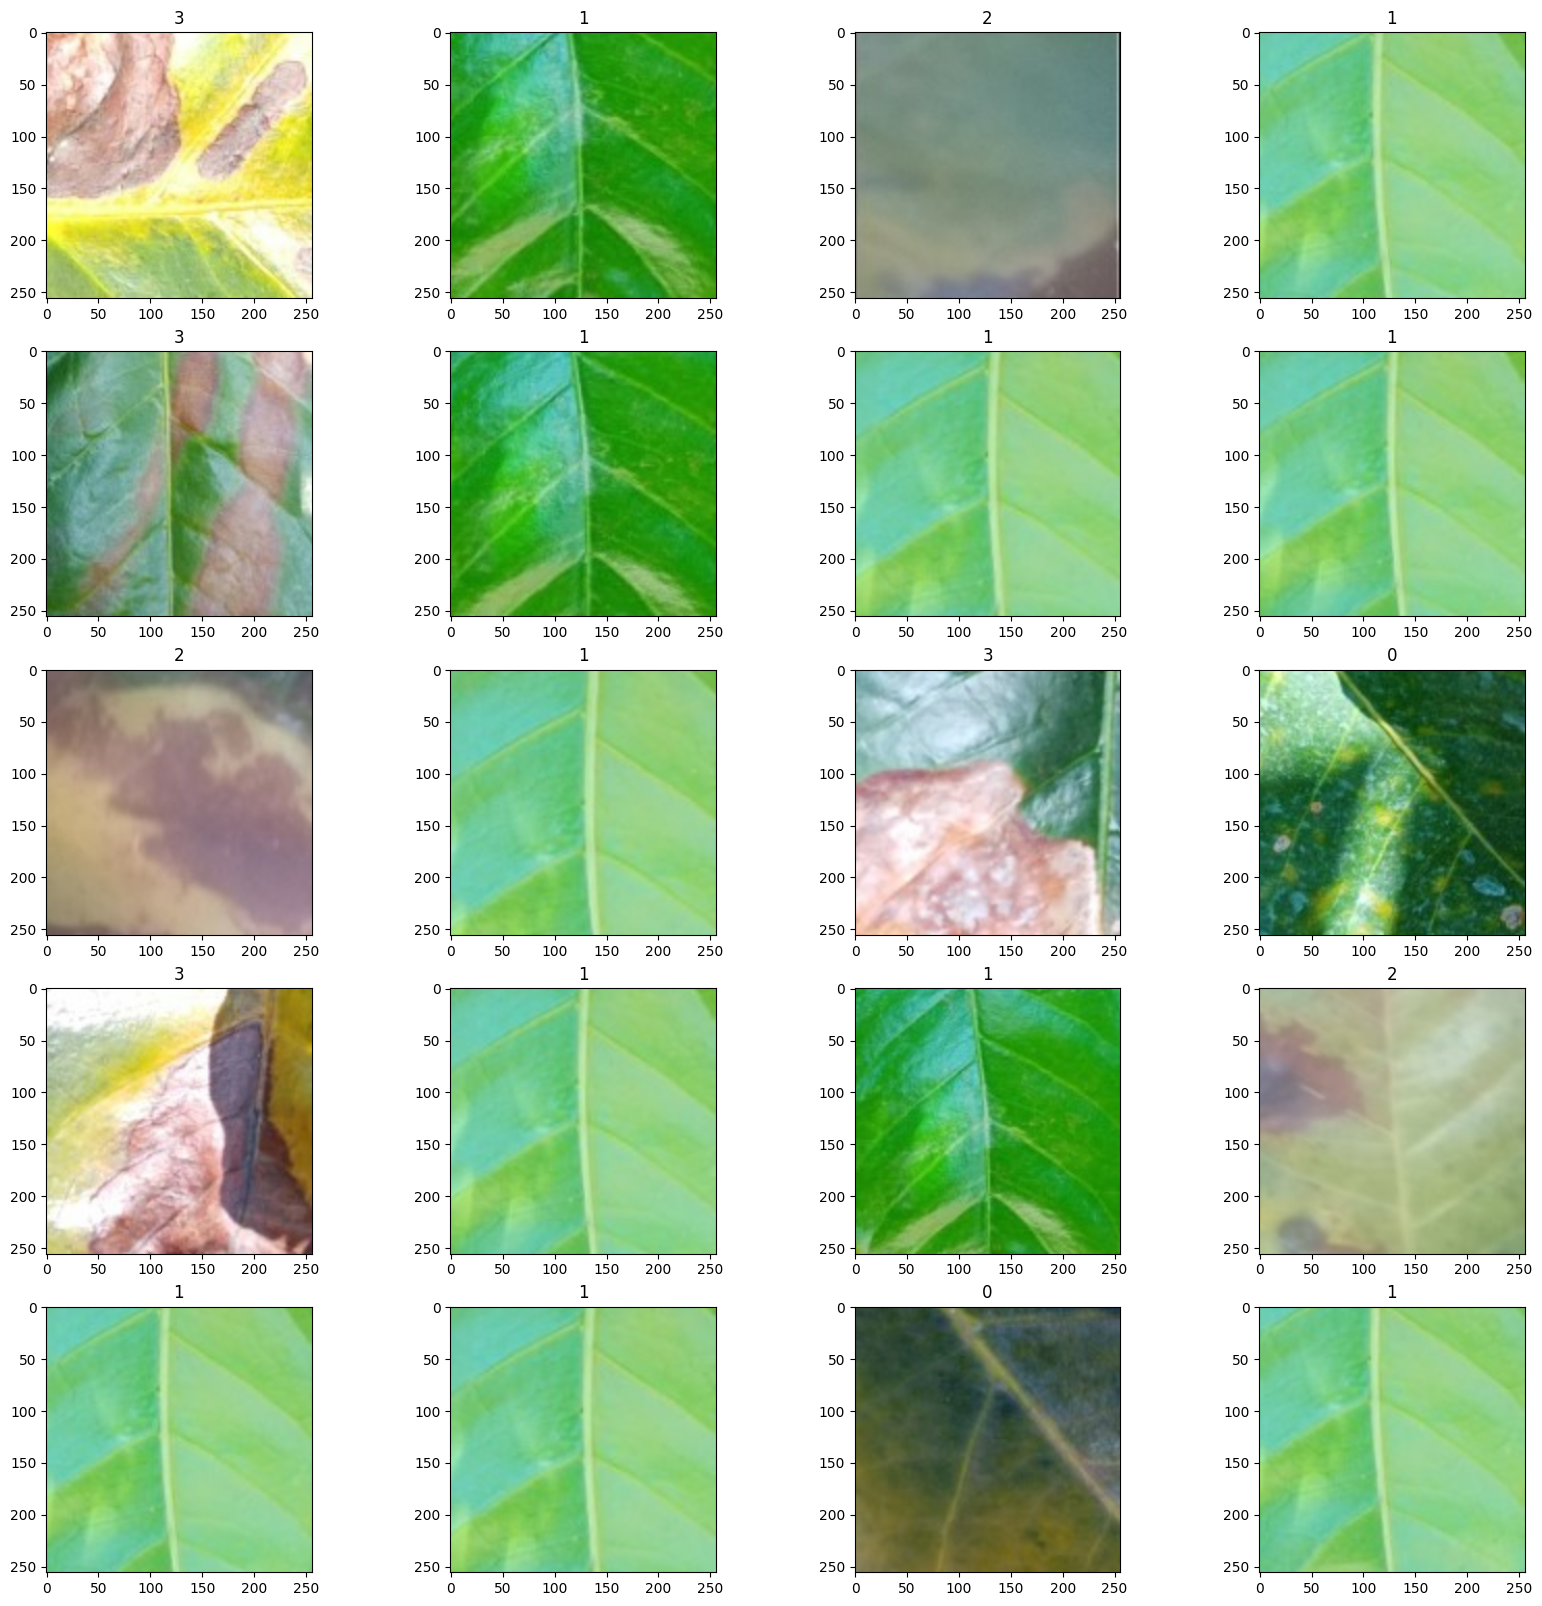

In [46]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for i in range(5):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(batch_scaled[0][idx])
        ax[i, j].set_title(batch_scaled[1][idx])

plt.show()

From the above we can see the images with their assigned classes